# Imports

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset(s)

In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_rows', 20)


gold_data = pd.read_csv('../Data/FINAL_USO.xls')
vix_data = pd.read_csv('../Data/VVIX_History.csv')
# Renaming to just be one word
gold_data.rename(columns={"Adj Close": "Adj_close"}, inplace=True)
gold_data.rename(columns={"USO_Adj Close": "USO_Ajclose"}, inplace=True)
gold_data.rename(columns={"GDX_Adj Close": "GDX_Ajclose"}, inplace=True)


# Data Preprocessing

In [31]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Date         object 
 1   Open         float64
 2   High         float64
 3   Low          float64
 4   Close        float64
 5   Adj_close    float64
 6   Volume       int64  
 7   SP_open      float64
 8   SP_high      float64
 9   SP_low       float64
 10  SP_close     float64
 11  SP_Ajclose   float64
 12  SP_volume    int64  
 13  DJ_open      float64
 14  DJ_high      float64
 15  DJ_low       float64
 16  DJ_close     float64
 17  DJ_Ajclose   float64
 18  DJ_volume    int64  
 19  EG_open      float64
 20  EG_high      float64
 21  EG_low       float64
 22  EG_close     float64
 23  EG_Ajclose   float64
 24  EG_volume    int64  
 25  EU_Price     float64
 26  EU_open      float64
 27  EU_high      float64
 28  EU_low       float64
 29  EU_Trend     int64  
 30  OF_Price     float64
 31  OF_Open      float64
 32  OF_H

In [32]:
print(gold_data.isnull().sum())

Date           0
Open           0
High           0
Low            0
Close          0
Adj_close      0
Volume         0
SP_open        0
SP_high        0
SP_low         0
SP_close       0
SP_Ajclose     0
SP_volume      0
DJ_open        0
DJ_high        0
DJ_low         0
DJ_close       0
DJ_Ajclose     0
DJ_volume      0
EG_open        0
EG_high        0
EG_low         0
EG_close       0
EG_Ajclose     0
EG_volume      0
EU_Price       0
EU_open        0
EU_high        0
EU_low         0
EU_Trend       0
OF_Price       0
OF_Open        0
OF_High        0
OF_Low         0
OF_Volume      0
OF_Trend       0
OS_Price       0
OS_Open        0
OS_High        0
OS_Low         0
OS_Trend       0
SF_Price       0
SF_Open        0
SF_High        0
SF_Low         0
SF_Volume      0
SF_Trend       0
USB_Price      0
USB_Open       0
USB_High       0
USB_Low        0
USB_Trend      0
PLT_Price      0
PLT_Open       0
PLT_High       0
PLT_Low        0
PLT_Trend      0
PLD_Price      0
PLD_Open      

In [33]:
gold_data.describe()

Open         High          Low        Close    Adj_close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529999   
75%    1.020795e+07   237.292500   237.722500   236.147503   236.889996   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987   

        SP_Ajclose     SP_volume       DJ_open       DJ_high        DJ_low  \
count  1718.000000  1.718000e+03   1718.000000   1718.000000   1718.000000   
mean    192.204570  1.098026e+08  18161.094398  18244.137842  18073.889095   
std      48.514161  4.925110e+07   3889.752079   3906.008604   3867.959072   
min     104.468536  2.785650e+07  11769.209960  11925.879880  11735.190430   
25%     153.027992  7.387085e+07  15487.930173  15551.170168  15419.387207   
50%     191.658341  9.972020e+07  17601.095705  17714.395510  17510.290040   
75%     228.721389  1.351161e+08  20866.907225  20910.837405  20785.035648   
max     290.560242  5.072443e+08  26833.470700  26951.810550  26789.080080   

           DJ_close    DJ_Ajclose     DJ_volume      EG_open      EG_high  \
count   1718.000000   1718.000000  1.718000e+03  1718.000000  1718.000000   
mean   18164.119043  18164.119043  1.779131e+08    28.276554    28.822555   
std     3884.495887   3884.495887  1.212753e+08    20.325861    20.620624   
min    11766.259770  11766.259770  8.410000e+06     2.770000     2.850000   
25%    15495.665280  15495.665280  9.232000e+07    14.200000    14.550000   
50%    17612.939455  17612.939455  1.206950e+08    22.800000    23.125000   
75%    20851.157715  20851.157715  2.636300e+08    37.150002    37.849998   
max    26828.390630  26828.390630  9.005100e+08    80.199997    81.000000   

            EG_low     EG_close   EG_Ajclose     EG_volume     EU_Price  \
count  1718.000000  1718.000000  1718.000000  1.718000e+03  1718.000000   
mean     27.653655    28.209302    27.783958  1.136074e+06     1.208494   
std      19.972314    20.294635    19.721857  7.301289e+05     0.100535   
min       2.730000     2.800000     2.800000  1.645000e+05     1.038700   
25%      13.762500    14.150000    14.082418  7.006250e+05     1.120800   
50%      21.800000    22.524999    22.408089  9.688000e+05     1.184050   
75%      36.450001    37.187501    36.811500  1.344775e+06     1.305550   
max      77.900002    79.800003    77.999313  1.006120e+07     1.393400   

           EU_open      EU_high       EU_low     EU_Trend     OF_Price  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean      1.208531     1.213360     1.203692     0.494761    77.504523   
std       0.100579     0.100184     0.100695     0.500118    27.400703   
min       1.039000     1.041900     1.034100     0.000000    27.880000   
25%       1.120900     1.125800     1.115900     0.000000    52.152500   
50%       1.184100     1.187850     1.179450     0.000000    70.115000   
75%       1.305475     1.310275     1.299850     1.000000   107.730000   
max   

In [34]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

vix_data = vix_data.rename(columns={'DATE': 'Date'})
vix_data['Date'] = pd.to_datetime(vix_data['Date'])
vix_data.set_index('Date', inplace=True)

In [35]:
pd.set_option('display.max_columns', None)
gold_data.head(10)

Open        High         Low       Close   Adj_close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
2011-12-22  156.350006  156.800003  155.330002  156.039993  156.039993   
2011-12-23  156.350006  156.490005  155.820007  156.309998  156.309998   
2011-12-27  155.080002  155.550003  154.539993  154.910004  154.910004   
2011-12-28  154.050003  154.259995  150.660004  151.029999  151.029999   
2011-12-29  149.089996  150.720001  148.270004  150.339996  150.339996   

              Volume     SP_open     SP_high      SP_low    SP_close  \
Date                                                                   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998   
2011-12-22   9888400  124.629997  125.400002  124.230003  125.269997   
2011-12-23   3565100  125.669998  126.430000  125.410004  126.389999   
2011-12-27   4918600  126.169998  126.820000  126.059998  126.489998   
2011-12-28  16436100  126.510002  126.529999  124.730003  124.830002   
2011-12-29  19812200  125.239998  126.250000  124.860001  126.120003   

            SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low  \
Date                                                                       
2011-12-15  105.441238  199109200  11825.29004  11967.83984  11825.21973   
2011-12-16  105.597549  220481400  11870.25000  11968.17969  11819.30957   
2011-12-19  104.468536  183903000  11866.54004  11925.87988  11735.19043   
2011-12-20  107.629784  225418100  11769.20996  12117.12988  11768.83008   
2011-12-21  107.838242  194230900  12103.58008  12119.70020  11999.44043   
2011-12-22  108.793526  119465400  12107.58984  12182.70996  12107.37012   
2011-12-23  109.766220   92187200  12169.87988  12297.44043  12169.79981   
2011-12-27  109.853065   86075700  12293.46973  12328.46973  12269.96973   
2011-12-28  108.411423  119107100  12288.84961  12299.11035  12140.16992   
2011-12-29  109.531738  123507200  12152.32031  12293.95996  12152.08984   

               DJ_close   DJ_Ajclose  DJ_volume    EG_open    EG_high  \
Date                                                                    
2011-12-15  11868.80957  11868.80957  136930000  74.550003  76.150002   
2011-12-16  11866.38965  11866.38965  389520000  73.599998  75.099998   
2011-12-19  11766.25977  11766.25977  135170000  69.099998  69.800003   
2011-12-20  12103.58008  12103.58008  165180000  66.449997  68.099998   
2011-12-21  12107.74023  12107.74023  163250000  67.099998  69.400002   
2011-12-22  12169.65039  12169.65039  151610000  68.400002  70.000000   
2011-12-23  12294.00000  12294.00000   80420000  70.050003  71.750000   
2011-12-27  12291.34961  12291.34961   95980000  70.800003  71.150002   
2011-12-28  12151.41016  12151.41016   84010000  68.500000  68.599998   
2011-12-29  12287.04004  12287.04004    8410000  66.000000  67.800003   

               EG_low   EG_close  EG_Ajclose  EG_volume  EU_Price  EU_open  \
Date                                                                         
2011-12-15  72.150002  72.900002   70.431755     787900    1.3018   1.2982   
2011-12-16  73.349998  74.900002   72.364037     896600    1.3035   1.3020   
2011-12-19  64.199997  64.699997   62.509384    2096700    1.2995   1.3043   
2011-12-20  66.000000  67.000000   64.731514     875300    1.3079   1.3003   
2011-1

In [36]:
start_date = gold_data.index.min()
end_date = gold_data.index.max()

vix_data_filtered = vix_data[(vix_data.index >= start_date) & (vix_data.index <= end_date)]
gold_data.join(vix_data_filtered, how='outer')

Open        High         Low       Close   Adj_close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
2011-12-22  156.350006  156.800003  155.330002  156.039993  156.039993   
2011-12-23  156.350006  156.490005  155.820007  156.309998  156.309998   
2011-12-27  155.080002  155.550003  154.539993  154.910004  154.910004   
2011-12-28  154.050003  154.259995  150.660004  151.029999  151.029999   
2011-12-29  149.089996  150.720001  148.270004  150.339996  150.339996   
2011-12-30  152.139999  153.750000  151.789993  151.990005  151.990005   
2012-01-03  154.759995  156.300003  154.550003  155.919998  155.919998   
2012-01-04  155.429993  157.380005  155.339996  156.710007  156.710007   
2012-01-05  155.369995  158.029999  155.250000  157.779999  157.779999   
2012-01-06  158.589996  158.630005  156.380005  157.199997  157.199997   
2012-01-09  157.360001  157.589996  156.190002  156.500000  156.500000   
2012-01-10  158.970001  159.470001  158.470001  158.639999  158.639999   
2012-01-11  159.339996  160.050003  158.910004  159.669998  159.669998   
2012-01-12  161.020004  161.619995  159.830002  160.380005  160.380005   
2012-01-13  159.320007  159.589996  158.009995  159.259995  159.259995   
2012-01-17  161.169998  161.649994  160.419998  160.500000  160.500000   
2012-01-18  159.940002  161.639999  159.679993  161.600006  161.600006   
2012-01-19  160.960007  161.449997  160.330002  161.220001  161.220001   
2012-01-20  160.500000  162.089996  160.000000  162.070007  162.070007   
2012-01-23  162.320007  163.470001  162.320007  163.160004  163.160004   
2012-01-24  161.809998  162.369995  161.529999  162.009995  162.009995   
2012-01-25  161.070007  166.550003  160.289993  166.419998  166.419998   
2012-01-26         NaN         NaN         NaN         NaN         NaN   
2012-01-27  167.440002  169.000000  167.410004  168.970001  168.970001   
2012-01-30  168.190002  168.539993  167.740005  168.029999  168.029999   
2012-01-31  169.770004  169.860001  167.720001  169.309998  169.309998   
2012-02-01  169.750000  170.179993  169.080002  169.559998  169.559998   
2012-02-02  169.960007  171.229996  169.679993  171.050003  171.050003   
2012-02-03  169.880005  170.139999  167.509995  167.639999  167.639999   
2012-02-06  166.960007  167.679993  166.610001  167.179993  167.179993   
2012-02-07  167.380005  170.089996  167.149994  169.699997  169.699997   
2012-02-08  169.259995  169.960007  167.500000  168.500000  168.500000   
2012-02-09  170.009995  170.369995  167.669998  168.020004  168.020004   
2012-02-10  166.490005  167.639999  166.330002  167.139999  167.139999   
2012-02-13  167.330002  167.940002  166.740005  167.509995  167.509995   
2012-02-14  167.649994  167.929993  166.419998  167.119995  167.119995   
2012-02-15  168.630005  168.750000  167.190002  168.110001  168.110001   
2012-02-16  166.330002  168.139999  166.169998  168.000000  168.000000   
2012-02-17  168.289993  168.330002  166.869995  167.350006  167.350006   
2012-02-21  169.649994  171.070007  169.589996  171.020004  171.020004   
2012-02-22  170.399994  173.169998  170.190002  172.940002  172.940002   
2012-02-23  172.690002  173.770004  172.279999  173.020004  173.020004   
2012-02-24  172.630005  173.039993  172.000000  172.229996  172.229996   
2012-02-27  172.139999  172.919998  171.580002  171.699997  171.699997   
2012-02-28  172.839996  174.000000  172.600006  173.490005  173.490005   
2012-02-29  173.190002  173.589996  164.000000  164.289993  164.289993   
2012-03-01  166.100006  167.720001  165.750000  166.610001  166.610001   
2012-03-02  166.229996

In [38]:
print(list(gold_data.columns))
gold_data.isnull().values.any()

['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Ajclose', 'GDX_Volume', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Ajclose', 'USO_Volume']


False

<Figure size 1000x500 with 0 Axes>

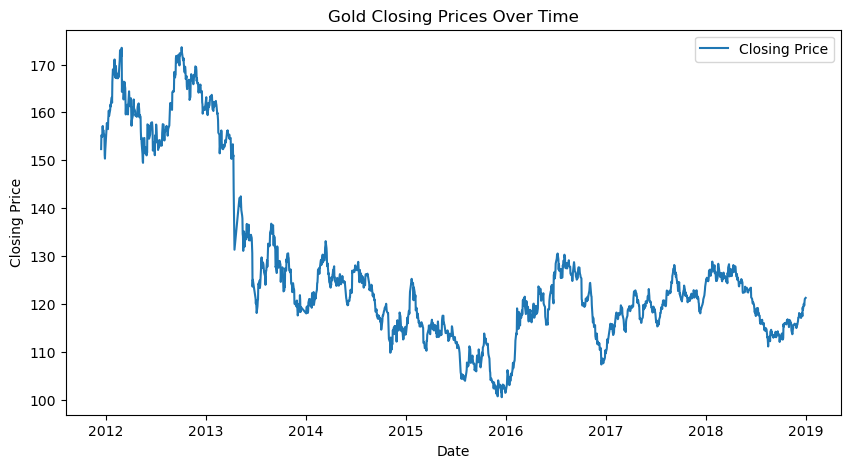

In [39]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

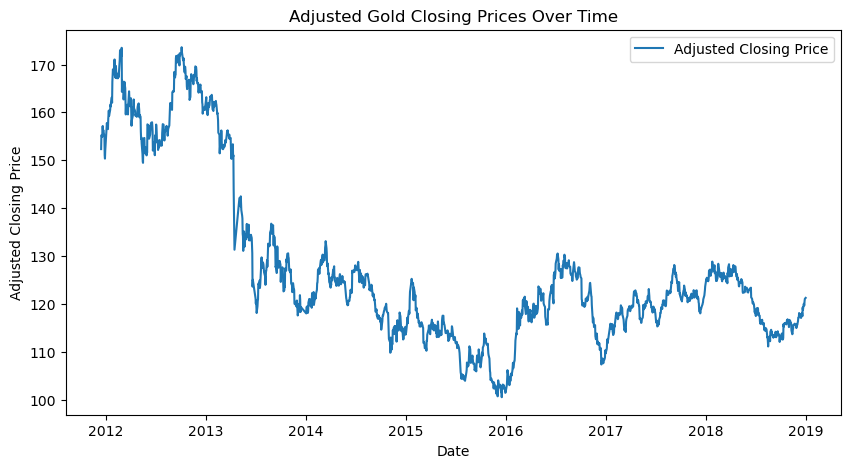

In [40]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Adj_close'], label='Adjusted Closing Price')
plt.title('Adjusted Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

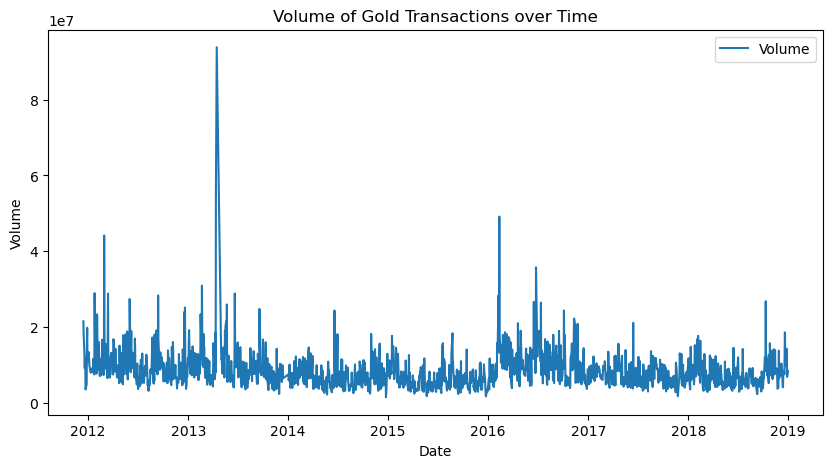

In [41]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Volume'], label='Volume')
plt.title('Volume of Gold Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

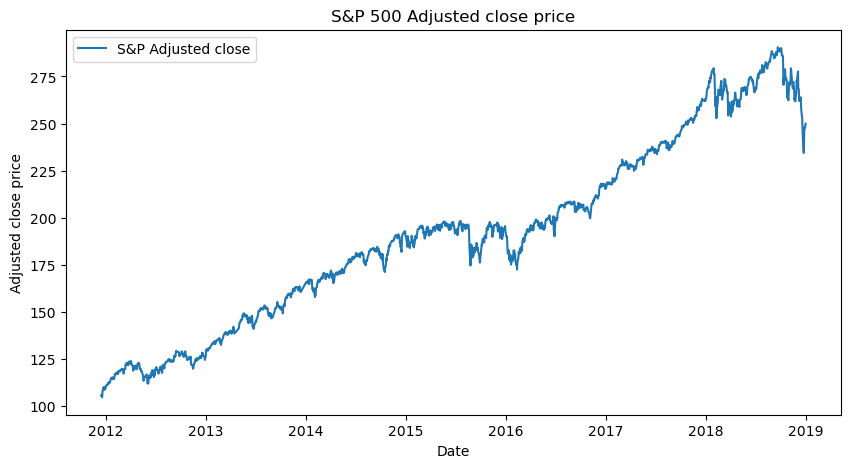

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(gold_data['SP_Ajclose'], label='S&P Adjusted close')
plt.title('S&P 500 Adjusted close price')
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.legend()
plt.show()

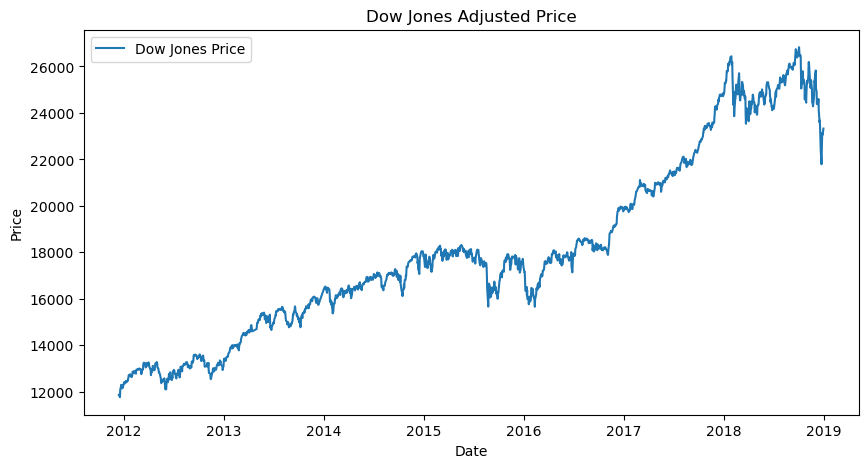

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(gold_data['DJ_Ajclose'], label='Dow Jones Price')
plt.title('Dow Jones Adjusted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
## Create the target variable - opening price for the next day
gold_data["Next_Day_Open"] = gold_data["Open"].shift(-1)
gold_data = gold_data.dropna(subset=['Next_Day_Open'])

In [45]:
##Computing daily percentage returns on assets, Absolute returns on assets, and rolling averages

def feature_engineer(data, feature):
    df = data[feature]
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0

    absolute_return = (df - df.shift(1)) 
    absolute_return[0] = 0

    three_day_ave = df.rolling(window=3).mean().fillna(0)
    week_ave = df.rolling(window=5).mean().fillna(0)
    month_ave = df.rolling(window=30).mean().fillna(0)
    week_var = df.rolling(window = 5).var().fillna(0)
    month_var = df.rolling(window = 30).var().fillna(0)
    engineered_features = pd.DataFrame({f"{feature}_pret": daily_return,f"{feature}_aret" :absolute_return, f"{feature}_three_ave":three_day_ave, f"{feature}_week_ave": week_ave, f"{feature}_month_ave": month_ave, f"{feature}_week_var": week_var, f"{feature}_month_var": month_var})
    return engineered_features


import_asset_list = [
    "Adj_close", "SP_Ajclose","DJ_Ajclose","EG_Ajclose","USO_Ajclose","EU_Price","OF_Price","OS_Price","SF_Price","USB_Price","PLT_Price","PLD_Price","USDI_Price","GDX_Ajclose"
]

for asset in import_asset_list :
    temp = feature_engineer(gold_data, asset)
    gold_data = pd.concat([gold_data,temp], axis=1)


feature_list = list(gold_data.columns)


duplicates = [item for item in set(feature_list) if feature_list.count(item) > 1]
print(duplicates)

[]


['Adj_close_pret', 'SP_Ajclose_pret', 'DJ_Ajclose_pret', 'EG_Ajclose_pret', 'USO_Ajclose_pret', 'EU_Price_pret', 'OF_Price_pret', 'OS_Price_pret', 'SF_Price_pret', 'USB_Price_pret', 'PLT_Price_pret', 'PLD_Price_pret', 'USDI_Price_pret', 'GDX_Ajclose_pret']
plotting Adj_close_pret
plotting SP_Ajclose_pret
plotting DJ_Ajclose_pret
plotting EG_Ajclose_pret
plotting USO_Ajclose_pret
plotting EU_Price_pret
plotting OF_Price_pret
plotting OS_Price_pret
plotting SF_Price_pret
plotting USB_Price_pret
plotting PLT_Price_pret
plotting PLD_Price_pret
plotting USDI_Price_pret
plotting GDX_Ajclose_pret


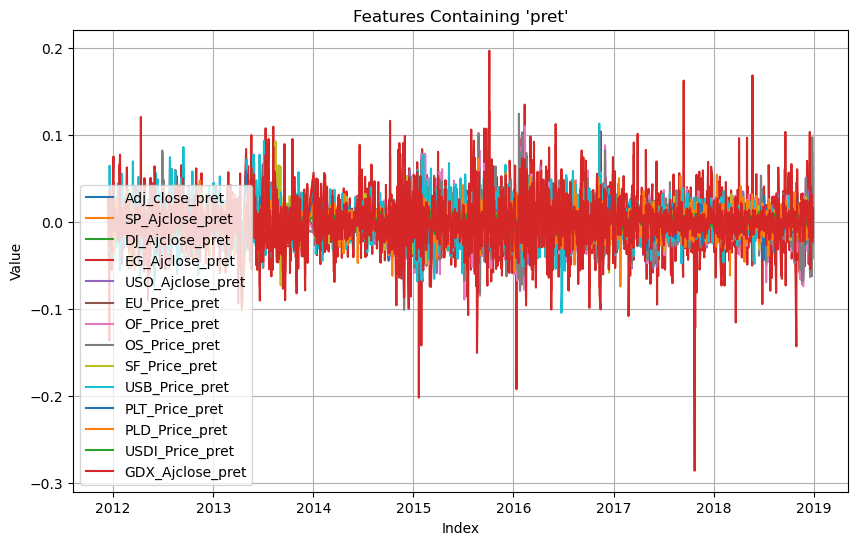

In [46]:
pret_columns = [col for col in gold_data.columns if "pret" in col]

print(pret_columns)
plt.figure(figsize=(10, 6))  
for col in pret_columns:
    plt.plot(gold_data.index, gold_data[col], label=col)  
    print(f"plotting {col}")


plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Features Containing 'pret'")
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

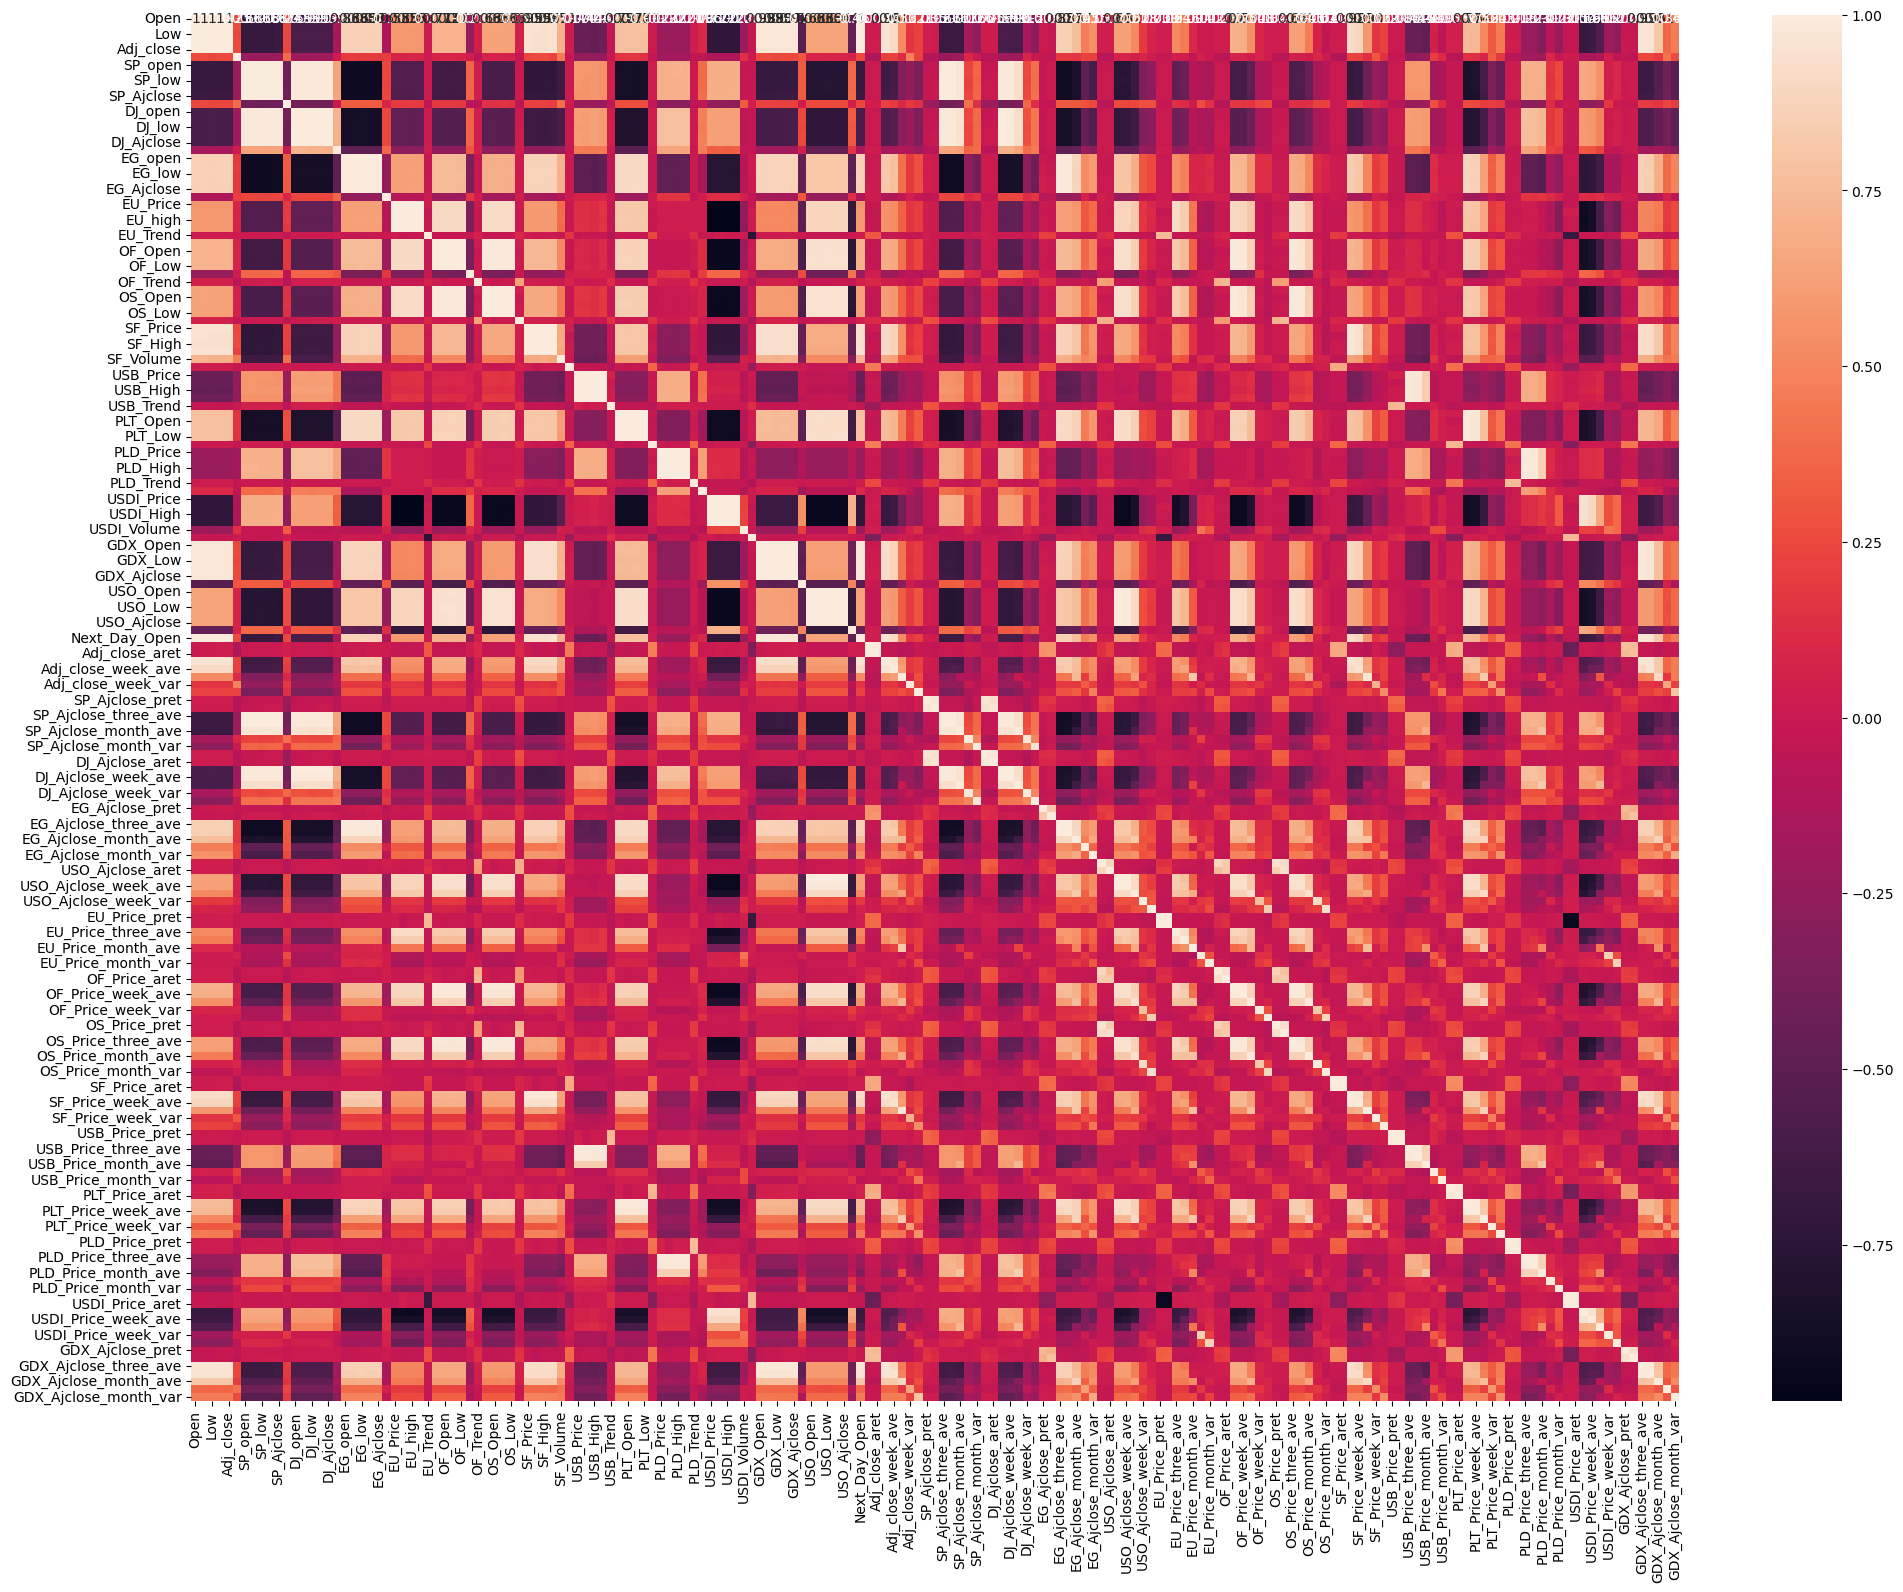

In [47]:
plt.figure(figsize=(24,18)) 
sns.heatmap(gold_data.corr(), annot=True) 

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Normalize the data

predictors = [
    'Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'SP_open',
    'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
    'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
    'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
    'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 
    'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open', 
    'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 
    'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High', 
    'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 
    'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend', 
    'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 
    'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High', 'GDX_Low', 
    'GDX_Close', 'GDX_Ajclose', 'GDX_Volume', 'USO_Open', 'USO_High', 
    'USO_Low', 'USO_Close', 'USO_Ajclose', 'USO_Volume'
]

gold_data[predictors] = gold_data[predictors].fillna(0)
gold_data[predictors] = scaler.fit_transform(gold_data[predictors])
gold_data.head(100)

Open      High       Low     Close  Adj_close    Volume  \
Date                                                                      
2011-12-15  1.564097  1.536653  1.433028  1.426065   1.426065  2.657242   
2011-12-16  1.539562  1.560475  1.558919  1.591442   1.591442  1.966776   
2011-12-19  1.606319  1.588269  1.585363  1.570912   1.570912  0.833387   
2011-12-20  1.682776  1.677319  1.712979  1.691239   1.691239  0.140218   
2011-12-21  1.691905  1.682991  1.687111  1.701504   1.701504  0.721392   
2011-12-22  1.655959  1.641585  1.641123  1.637633   1.637633  0.293061   
2011-12-23  1.655959  1.624002  1.669291  1.653031   1.653031 -0.991972   
2011-12-27  1.583497  1.570686  1.595709  1.573194   1.573194 -0.716911   
2011-12-28  1.524728  1.497516  1.372669  1.351930   1.351930  1.623697   
2011-12-29  1.241725  1.296728  1.235281  1.312582   1.312582  2.309794   
2011-12-30  1.415749  1.468589  1.437626  1.406676   1.406676  0.489028   
2012-01-03  1.565238  1.613226  1.596285  1.630790   1.630790  1.003809   
2012-01-04  1.603466  1.674483  1.641697  1.675842   1.675842  0.630674   
2012-01-05  1.600043  1.711351  1.636524  1.736860   1.736860  0.645285   
2012-01-06  1.783766  1.745383  1.701482  1.703784   1.703784  0.273166   
2012-01-09  1.713586  1.686394  1.690560  1.663866   1.663866  0.066164   
2012-01-10  1.805448  1.793028  1.821625  1.785903   1.785903 -0.015226   
2012-01-11  1.826559  1.825925  1.846918  1.844640   1.844640 -0.097105   
2012-01-12  1.922415  1.914975  1.899804  1.885130   1.885130  0.031738   
2012-01-13  1.825419  1.799834  1.795182  1.821259   1.821259  0.094290   
2012-01-17  1.930974  1.916677  1.933720  1.891973   1.891973 -0.027034   
2012-01-18  1.860794  1.916110  1.891181  1.954702   1.954702  0.181858   
2012-01-19  1.918992  1.905333  1.928547  1.933032   1.933032 -0.067495   
2012-01-20  1.892745  1.941634  1.909577  1.981505   1.981505  0.644289   
2012-01-23  1.996590  2.019908  2.042942  2.043664   2.043664  0.078398   
2012-01-24  1.967490  1.957515  1.997528  1.978083   1.978083 -0.191887   
2012-01-25  1.925268  2.194605  1.926247  2.229570   2.229570  4.168360   
2012-01-27  2.288721  2.333569  2.335539  2.374989   2.374989  0.931523   
2012-01-30  2.331514  2.307478  2.354509  2.321383   2.321383 -0.001692   
2012-01-31  2.421664  2.382348  2.353359  2.394377   2.394377  0.558083   
2012-02-01  2.420523  2.400498  2.431538  2.408634   2.408634 -0.144719   
2012-02-02  2.432505  2.460054  2.466028  2.493604   2.493604  0.622524   
2012-02-03  2.427941  2.398230  2.341287  2.299143   2.299143  3.029829   
2012-02-06  2.261334  2.258698  2.289551  2.272910   2.272910  0.073378   
2012-02-07  2.285298  2.395394  2.320592  2.416618   2.416618  0.643802   
2012-02-08  2.392565  2.388021  2.340712  2.348186   2.348186  0.448953   
2012-02-09  2.435358  2.411275  2.350484  2.320813   2.320813  1.552386   
2012-02-10  2.234517  2.256430  2.273455  2.270630   2.270630  0.382154   
2012-02-13  2.282445  2.273446  2.297024  2.291729   2.291729 -0.275858   
2012-02-14  2.300703  2.272878  2.278628  2.269489   2.269489 -0.118646   
2012-02-15  2.356619  2.319389  2.322892  2.325946   2.325946  0.648720   
2012-02-16  2.225388  2.284790  2.264257  2.319673   2.319673  0.464905   
2012-02-17  2.337219  2.295567  2.304496  2.282606   2.282606 -0.235621   
2012-02-21  2.414817  2.450980  2.460855  2.491893   2.491893  1.049615   
2012-02-22  2.457610  2.570091  2.495346  2.601384   2.601384  1.672551   
2012-02-23  2.588271  2.604124  2.615489  2.605947   2.605947  0.651910   
2012-02-24  2.584848  2.562717  2.599393  2.560895   2.560895  0.172205   
2012-02-27  2.556889  2.555911  2.575250  2.530671   2.530671 -0.224647   
2012-02-28  2.596829  2.617169  2.633885  2.632749   2.632749  0.806115   
2012-02-29  2.616799  2.593914  2.139515  2.108103   2.108103  7.255564   
2012-03-01  2.212265  2.260968  2.240114  2.240406   2.240406  2.185524   
2012-03-02  2.219682  2.210487  2.233216 

In [50]:
from sklearn.model_selection import train_test_split

# define the train test split
X = gold_data.drop(columns=['Next_Day_Open'])  
y = gold_data['Next_Day_Open'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25
)

RMSE:  7.994162213412003
R2 score:  0.7849949822506688


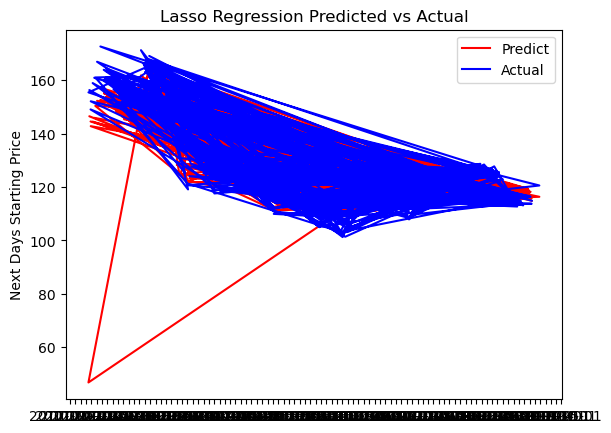

In [51]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

lasso = LassoCV(n_alphas=1000, max_iter=3000)
#ridge = RidgeCV(gcv_mode='auto')

lasso_model = lasso.fit(X_train,y_train)
predicted = lasso_model.predict(X_test)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)
    
R2_score = r2_score(y_test, predicted)
print('R2 score: ', R2_score)

plt.plot(y_test.index, predicted,'r', label='Predict')
plt.plot(y_test.index, y_test,'b', label='Actual')
plt.ylabel('Next Days Starting Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Lasso Regression Predicted vs Actual')
plt.legend(loc='upper right')
plt.show()

In [ ]:
ridge = RidgeCV(gcv_mode='auto')

ridge_model = lasso.fit(X_train,y_train)
predicted = lasso_model.predict(X_test)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)
    
R2_score = r2_score(y_test, predicted)
print('R2 score: ', R2_score)

plt.plot(y_test.index, predicted,'r', label='Predict')
plt.plot(y_test.index, y_test,'b', label='Actual')
plt.ylabel('Next Days Starting Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Ridge Regression Predicted vs Actual')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_trained = sgd.fit(X_train,y_train)
predicted = sgd_trained.predict(X_test)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)
    
R2_score = r2_score(y_test, predicted)
print('R2 score: ', R2_score)

plt.plot(y_test.index, predicted,'r', label='Predict')
plt.plot(y_test.index, y_test,'b', label='Actual')
plt.ylabel('Next Days Starting Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('SGD Predicted vs Actual')
plt.legend(loc='upper right')
plt.show()